In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
import csv
from scipy import integrate
from car_park_functions import *
import math

In [2]:
bolTrainagain = False # will try to load data if false 

In [3]:
available_parkings = ['Vilanova', 'SantSadurni', 'SantBoi', 'QuatreCamins',
                      'Cerdanyola','Granollers','Martorell','Mollet',
                      'SantQuirze','PratDelLlobregat']
df_column_name=['Parking Vilanova Renfe','Parking Sant Sadurní Renfe','Parking Sant Boi de Llobregat',
              'Parking Quatre Camins','Cerdanyola Universitat Renfe','Parking Granollers Renfe',
                'Parking Martorell FGC','Parking Mollet Renfe','Parking Sant Quirze FGC',
               'Parking Prat del Ll.']
current_parking_ix=9
# problems on Weekend with 2 SantBoi, 4 Cerdanyola, 
# bad data: 6 Martorell, 8 SantQuirze DO NOT USE
#good 0 Vilanova, 1 SantSadurni, 3 QuatreCamins, 5 Granollers, 7 Mollet, 9 PratDelLlobregat 
# needs treshold  3 QuatreCamins, 2 SantBoi,  7 Mollet 
current_parking = available_parkings[current_parking_ix]
current_column_name=df_column_name[current_parking_ix]


# loadind data:
    # Getting back the objects:
with open('data/'+current_parking+'_normalized.pkl','rb') as f:  # Python 3: open(..., 'rb')
    df_normalized, weekday_offset, friday_offset,  weekend_offset, max_value= pickle.load(f)
    f.close()
axis_ylim = max_value+20

df_training, df_testing = split_data(df_normalized, 3)



df_mean_areas = df_training.groupby(['Profile_3'], as_index=False).mean() 
df_mean_areas[['Profile_3', 'Area']]

friday_area = df_mean_areas.iloc[0]['Area']
weekday_area = df_mean_areas.iloc[1]['Area']
weekend_area = df_mean_areas.iloc[2]['Area']

friday_max = df_mean_areas.iloc[0]['MaxV']
weekday_max = df_mean_areas.iloc[1]['MaxV']
weekend_max = df_mean_areas.iloc[2]['MaxV']

print('Weekday area: ' , weekday_area)
print('Friday area: ' , friday_area)
print('Weekend area: ' , weekend_area)

print('Weekday maximum: ' , weekday_max)
print('Friday maximum: ' , friday_max)
print('Weekend maximum: ' , weekend_max)

max(df_normalized['Occupancy']+df_normalized['Free slots'])

Weekday area:  3183.0471014492737
Friday area:  2525.0833333333367
Weekend area:  991.2083333333352
Weekday maximum:  167.43478260869566
Friday maximum:  129.66666666666666
Weekend maximum:  47.0


462

In [4]:
def Max_by_date(date):
    df_day = df_normalized[(df_normalized['Date'] == date)]
    Profile = df_day['Occupancy'].values
    MaxV = max(Profile)
    return MaxV

df_normalized['MaxTEMP'] = df_normalized['Date'].apply(lambda x: Max_by_date(x))

In [5]:
df_normalized["Occupancy"]

0        0
1        0
2        0
3        0
4        0
        ..
2539    62
2540    62
2541    59
2542    59
2543    59
Name: Occupancy, Length: 2544, dtype: int64

<AxesSubplot:>

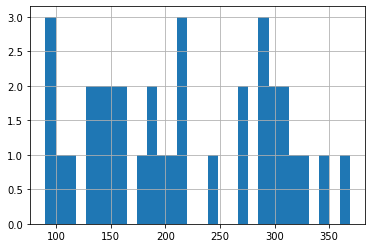

In [6]:
filterWD=(df_normalized["Profile_3"]=="Weekday") & (df_normalized["hour"]==12.0)
df_normalized.where(filterWD, inplace = False)['MaxTEMP'].hist(bins=30)

In [7]:
filterWD=(df_normalized["Profile_3"]=="Weekday") & (df_normalized["hour"]==12.0)
from pathlib import Path  
filepath = Path('data/'+current_parking+'_WD_maxV2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_normalized[filterWD]['MaxTEMP'].to_csv(filepath)  

In [8]:
filterFR=(df_normalized["Profile_3"]=="Friday") & (df_normalized["hour"]==12.0)
from pathlib import Path  
filepath = Path('data/'+current_parking+'_FR_maxV2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_normalized[filterFR]['MaxTEMP'].to_csv(filepath)  

In [9]:
filterWE=(df_normalized["Profile_3"]=="Weekend") & (df_normalized["hour"]==12.0)
from pathlib import Path  
filepath = Path('data/'+current_parking+'_WE_maxV2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_normalized[filterWE]['MaxTEMP'].to_csv(filepath)  

<AxesSubplot:>

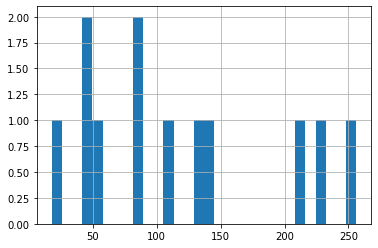

In [10]:
filterWE=(df_normalized["Profile_3"]=="Weekend") & (df_normalized["hour"]==12.0)
df_normalized.where(filterWE, inplace = False)['MaxTEMP'].hist(bins=30)

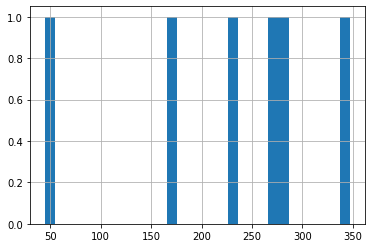

In [11]:
filterWD=(df_normalized["Profile_3"]=="Friday") & (df_normalized["hour"]==12.0)
df_normalized.where(filterWD, inplace = False)['MaxTEMP'].hist(bins=30);

In [12]:
df_normalized.where(filterWD, inplace = False)['MaxTEMP']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2539   NaN
2540   NaN
2541   NaN
2542   NaN
2543   NaN
Name: MaxTEMP, Length: 2544, dtype: float64